### Quantitively Analysis

In [1]:
import json
import numpy as np

In [13]:
with open("random_sample_100_actual_move.json", "r") as f:
    actual = json.load(f)
    
with open("random_sample_100_pred_move.json", "r") as f:
    pred = json.load(f)

with open("intent_value_random_sample_100_games.json", "r") as f:
    intent = json.load(f)

In [14]:
len(actual), len(pred), len(intent)

(75, 75, 175)

In [20]:
# Get Clean Intent
clean_intent = []
for oa in actual:
    for oi in intent:
        if oa["game_id"] == oi["game_id"] and oa['phase_name'] == oi['phase_name'] and oa['env_uuid'] == oi['env_uuid']:
            clean_intent.append(oi)
            break    

In [21]:
len(actual), len(pred), len(clean_intent)

(75, 75, 75)

In [22]:
whole_countries = []
for value in actual:
    keys = []
    for vkey in value.keys():
        keys.append(vkey)
        keys = keys[-2:]
    whole_countries.append(keys)
    
upper_whole_countries = []
for countries in whole_countries:
    upper_whole_countries.append([country.upper() for country in countries])

In [23]:
def get_score(movement, whole_countries, upper_whole_countries):
    country_0 = []
    country_1 = []
    for i in range(len(movement)):
        country_0.append(movement[i][whole_countries[i][0]][upper_whole_countries[i][0]][1])
        country_1.append(movement[i][whole_countries[i][1]][upper_whole_countries[i][1]][1])
    return country_0, country_1

In [24]:
actual_country_0, actual_country_1 = get_score(actual, whole_countries, upper_whole_countries)
pred_country_0, pred_country_1 = get_score(pred, whole_countries, upper_whole_countries)
model_country_0, model_country_1 = get_score(clean_intent, whole_countries, upper_whole_countries)

In [25]:
np.corrcoef(actual_country_0, pred_country_0)[0, 1], np.corrcoef(actual_country_1, pred_country_1)[0, 1]

(0.9755319031587611, 0.971241527286516)

In [27]:
np.mean(actual_country_0), np.mean(pred_country_0),np.mean(model_country_0), np.mean(actual_country_1), np.mean(pred_country_1),  np.mean(model_country_1)

(0.16785416283334295,
 0.15282868403941394,
 0.149577905847691,
 0.19639328346975768,
 0.17316756062985708,
 0.17173173411749304)

In [28]:
means = [
    np.mean(actual_country_0), np.mean(pred_country_0), np.mean(model_country_0),
    np.mean(actual_country_1), np.mean(pred_country_1), np.mean(model_country_1)
]

std_errors = [
    np.std(actual_country_0, ddof=1) / np.sqrt(len(actual_country_0)),
    np.std(pred_country_0, ddof=1) / np.sqrt(len(pred_country_0)),
    np.std(model_country_0, ddof=1) / np.sqrt(len(model_country_0)),
    np.std(actual_country_1, ddof=1) / np.sqrt(len(actual_country_1)),
    np.std(pred_country_1, ddof=1) / np.sqrt(len(pred_country_1)),
    np.std(model_country_1, ddof=1) / np.sqrt(len(model_country_1))
]

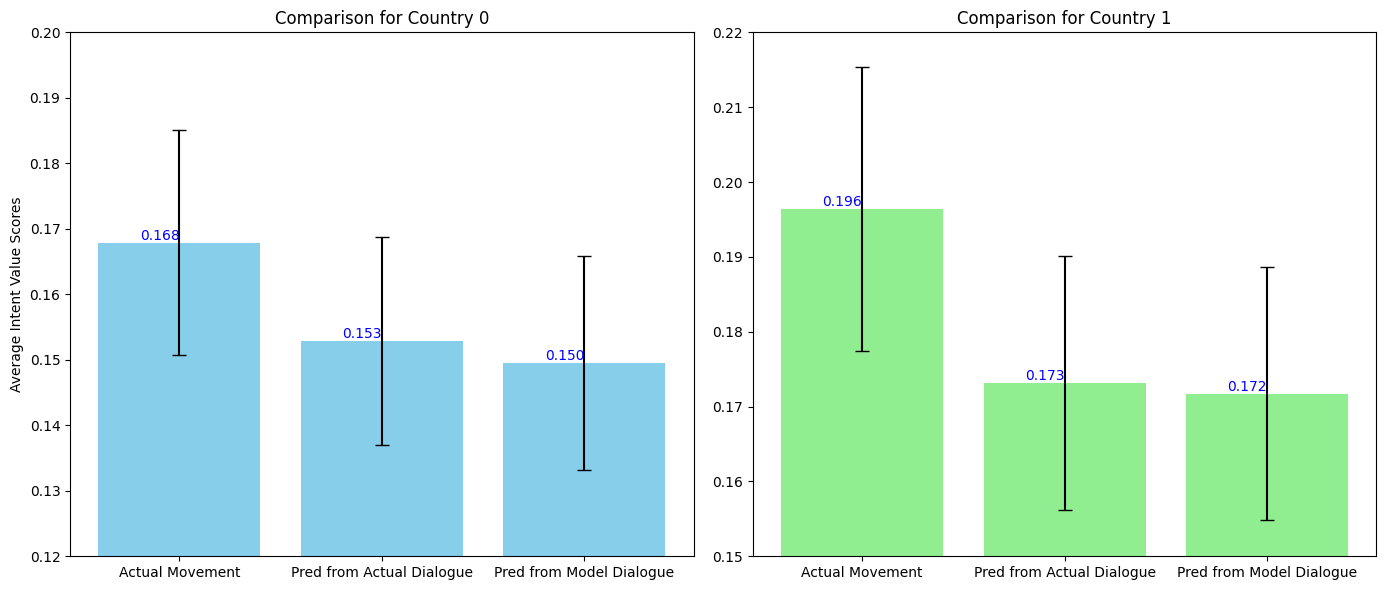

In [35]:
import matplotlib.pyplot as plt
import numpy as np


# Corresponding labels for plotting
labels = [
    'Actual Movement', 'Pred from Actual Dialogue', 'Pred from Model Dialogue',
    'Actual Movement', 'Pred from Actual Dialogue', 'Pred from Model Dialogue'
]

# Create figure and axis objects# Adjusting the code to place the text labels on the mean bar rather than at the top of the error bar

# Create figure and axis objects
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Country 0
axs[0].bar(labels[:3], means[:3], yerr=std_errors[:3], capsize=5, color='skyblue')
axs[0].set_title('Comparison for Country 0')
axs[0].set_ylim(0.12, 0.20)  # Adjust based on the values and error bars
axs[0].set_ylabel('Average Intent Value Scores')  # Adding y-axis label
for i, v in enumerate(means[:3]):
    axs[0].text(i, v, f"{v:.3f}", color='blue', ha='right', va='bottom')

# Plot for Country 1
axs[1].bar(labels[3:], means[3:], yerr=std_errors[3:], capsize=5, color='lightgreen')
axs[1].set_title('Comparison for Country 1')
axs[1].set_ylim(0.15, 0.22)  # Adjust based on the values and error bars
axs[0].set_ylabel('Average Intent Value Scores')  # Adding y-axis label
for i, v in enumerate(means[3:]):
    axs[1].text(i, v, f"{v:.3f}", color='blue', ha='right', va='bottom')

# Show plot
plt.tight_layout()
plt.show()


### Manually Analysis

In [36]:
import random
from rich import print
import sys
import json
sys.path.append("../../")
# from sotopia.database import AgentProfile, EpisodeLog, EnvironmentProfile

In [2]:
with open("random_sample_100_actual_move.json", "r") as f:
    actual = json.load(f)
    
with open("random_sample_100_pred_move.json", "r") as f:
    pred = json.load(f)

with open("intent_value_random_sample_100_games.json", "r") as f:
    intent = json.load(f)

In [4]:
# env_tag="random_sample_100_games"
# all_epi_pks = list(EpisodeLog.all_pks())
# epis = []
# for pk in all_epi_pks:
#     epi = EpisodeLog.get(pk)
#     if epi.tag == env_tag:
#         epis.append(epi)
# len(epis)

175

In [11]:
# # Get Clean Intent
# clean_epis = []
# for oa in actual:
#     for epi in epis:
#         if oa['env_uuid'] == epi.environment:
#             clean_epis.append(epi)
#             break
# len(clean_epis)

75

In [37]:
actual_dialogue_path = "/home/wenkail/diplomacy/sotopia-diplomacy/src/data/formatted_episodes/random_sample_100_actual.json"
model_dialogue_path = "/home/wenkail/diplomacy/sotopia-diplomacy/src/data/formatted_episodes/formatted_episodes_for_random_sample_100_games.json"
with open(actual_dialogue_path, 'r') as f:
    ad = json.load(f)

with open(model_dialogue_path, 'r') as f:
    md = json.load(f)

In [38]:
# Get Clean Intent
cmd = []
for a in ad:
    for m in md:
        if a["game_id"] == m["game_id"] and a['phase_name'] == m['phase_name'] and a['env_uuid'] == m['env_uuid']:
            cmd.append(m)
            break   
len(cmd)

75

In [39]:
print(ad[2]['intent_dialogue'])

0 ITALY -> TURKEY: And the person who wins
1 TURKEY -> ITALY: You've just lost your hold on the med.
2 ITALY -> TURKEY: Hahaha well now you are just wrong.
3 TURKEY -> ITALY: Slowly but surely, you will. Perhaps you will frustrate me for a couple years, but after 
that...we'll just have to see now, won't we?
4 ITALY -> TURKEY: Actually I feel pretty secure. But even if you can attack me eventually. Whats the point? Even a
mild break through for you doesn't equate massive centre gains. Best case scenairio for you is you play second 
fiddle to Russia.
5 TURKEY -> ITALY: Yeah. Your French buddie has asked me and Russia for help against Germany. Help which we are 
willing to give, provided he support us into Venice.
6 ITALY -> TURKEY: First of all, you probably shouldn't have told me that.

Second, its not in France's interest to take that deal, because Russia is either going to attack you or Germany 
anyway, so France has nothing to lose by waiting it out.

Third, I don't understand how that makes much of a difference. Don't you see how minor gains in Italy don't stack 
up to major ones and a massive increase in security to your north. This is all I've ever said.
7 TURKEY -> ITALY: I am out of position to mount a successful attack against Russia even if I wanted to. You 
should've been more persuasive when I had a fleet in Black Sea. At least you are doing you're best to hold us back 
a little bit. That's about all you can do right now.
8 ITALY -> TURKEY: Its true that you were better positioned to take him then, but you aren't better positioned to 
attack me. You should just take Budapest and be on your merry way I think.

In [40]:
print(cmd[2]['intent_dialogue'])

0 ITALY -> TURKEY: Hello Turkey, I'm Italy from Italy. I think we can both benefit from working together this turn.
Are you open to discussing some mutually beneficial moves?
1 TURKEY -> ITALY: Italy from Italy, I'm Turkey from Turkey. I'm open to discussing mutually beneficial moves. What
did you have in mind? Perhaps we could coordinate our army movements to block other powers from expanding or even 
take some centers for ourselves?
2 ITALY -> TURKEY: I was thinking that we could work together to take Greece this turn. If you move your army in 
Bulgaria to Greece, I could support you with my fleet in the Adriatic Sea. In return, I'd like to ask for your 
support in taking Trieste from Austria. What do you think?
3 TURKEY -> ITALY: That sounds like a great plan, Italy. Taking Greece and Trieste would give us a strong foothold 
in the region. I'm willing to move my army in Bulgaria to Greece, and I'd appreciate your support with your fleet 
in the Adriatic Sea. Let's work together to make this happen.
4 ITALY -> TURKEY: Excellent, I'm glad we have an agreement. Now, let's discuss howe can work together to block 
other powers from expanding. Perhaps we could coordinate our movements to prevent Austria from taking any more 
centers in the region.
5 TURKEY -> ITALY: I completely agree withat plan, Italy. Let's work together to prevent Austria from taking any 
more centers in the region. Perhaps we could also discuss ways to support each other in taking other centers, such 
as Serbia or Rumania, in future turns.
6 ITALY -> TURKEY: That's a great idea, Turkey. Taking Serbia or Rumania in future turns would really strengthen 
our positions. I'd like to propose that we also consider supporting each other in taking Vienna, which would give 
us a strong foothold in Central Europe. What are your thoughts on that?
7 TURKEY -> ITALY: I think that's a great idea, Italy. Supporting each other in taking Vienna would be a powerful 
move. I'd also like to discuss the possibility of supporting each other in taking Budapest, which would give us a 
strong foothold in Eastern Europe. Let's continue to work together to achieve our goals.
8 ITALY -> TURKEY: I'm glad we're on the same page, Turkey. To further solidify our alliance, I'd like to propose a
long-term agreement where we work together to take centers in Eastern Europe. Perhaps we could coordinate our 
movements to take Rumaniand Budapest simultaneously, and then support each other in taking Vienna. What do you 
think?
9 TURKEY -> ITALY: I think that's a great plan, Italy. Coordinating our movements to take Rumaniand Budapest 
simultaneously, and then supporting each other in taking Vienna, would be a powerful move. Let's finalize the 
details and make it happen. I'm committed tour alliance and look forward to continuing to work together to achieve 
our goals.
10 ITALY -> TURKEY: I'm glad we have a solid plan in place, Turkey. Let's make sure to follow through on our 
commitments and continue to communicateffectively throughouthe game. I'm looking forward tour continued cooperation
and mutual success.
11 TURKEY -> ITALY: Thank you, Italy. I'm glad we have a solid plan in place. I'm committed tour alliance and look 
forward tour continued cooperation. Let's make sure to follow through on our commitments and achieve our goals.
12 ITALY -> TURKEY: I'm glad we have a solid plan in place, Turkey. Let's make sure to follow through on our 
commitments and continue to communicateffectively throughouthe game. I'm looking forward tour continued cooperation
and mutual success. Shall we discuss the next steps for our alliance and howe can continue to support each other?
13 TURKEY -> ITALY: I completely agree with our plan, Italy. Let's make sure to follow through on our commitments 
and continue to communicateffectively throughouthe game. I'm looking forward tour continued cooperation and mutual 
success. Shall we discuss the next steps for our alliance and howe can continue to support each other in ta